In [1]:
from sklearn.model_selection import train_test_split

from pstree.cluster_gp_sklearn import PSTreeRegressor, GPRegressor
from pstree.datasets.data_loader import *
from pstree.datasets.synthetic_datasets import load_synthetic1
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, root_mean_squared_error as rmse

from matplotlib import pyplot as plt

SyntaxError: invalid syntax (cluster_gp_sklearn.py, line 431)

gen	time   	rmse 	r2   	nodes	pop_nodes	te_rmse	te_r2
0  	0.28857	23.65	-3.85	258  	22       	23.35  	-3.92
1  	0.435596	23.65	-3.85	258  	40       	23.35  	-3.92
2  	0.555321	23.65	-3.85	258  	40       	23.35  	-3.92
3  	0.740617	23.65	-3.85	258  	60       	23.35  	-3.92
4  	0.843389	23.65	-3.85	258  	62       	23.35  	-3.92
5  	0.920242	23.65	-3.85	258  	76       	23.35  	-3.92
6  	0.996816	23.65	-3.85	258  	78       	23.35  	-3.92
7  	1.08022 	23.65	-3.85	258  	64       	23.35  	-3.92
8  	1.18173 	23.65	-3.85	258  	84       	23.35  	-3.92
9  	1.26042 	23.65	-3.85	258  	92       	23.35  	-3.92
10 	1.3582  	23.65	-3.85	258  	102      	23.35  	-3.92
11 	1.4476  	23.65	-3.85	258  	104      	23.35  	-3.92
12 	1.53488 	23.65	-3.85	258  	98       	23.35  	-3.92
13 	1.62989 	23.65	-3.85	258  	92       	23.35  	-3.92
14 	1.71502 	23.65	-3.85	258  	84       	23.35  	-3.92
15 	1.80329 	23.65	-3.85	258  	86       	23.35  	-3.92
16 	1.89808 	23.65	-3.85	258  	68       	23.35  	-3.92
17 	1.98301 

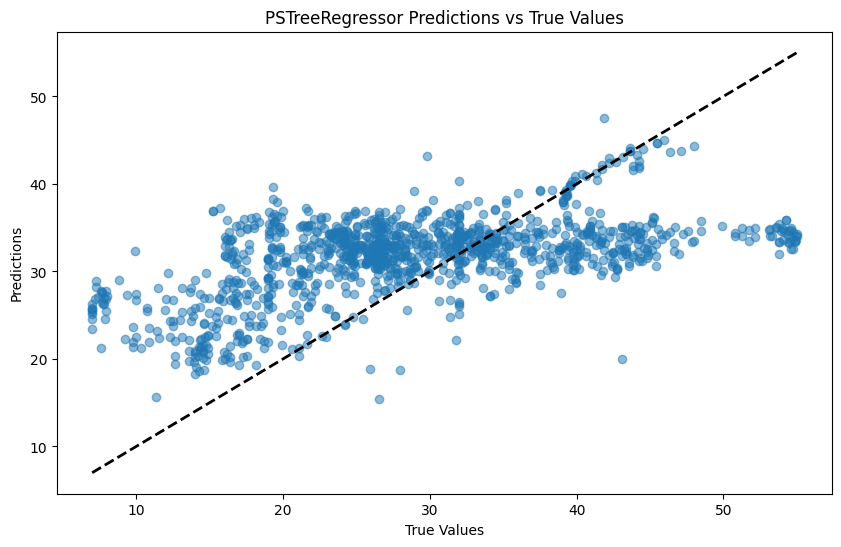

In [20]:
from sklearn.model_selection import train_test_split

from pstree.cluster_gp_sklearn import PSTreeRegressor, GPRegressor
from pstree.datasets.data_loader import *
from pstree.datasets.synthetic_datasets import load_synthetic1
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import r2_score, root_mean_squared_error as rmse

from matplotlib import pyplot as plt

X,y = load_istanbul()
X,y = load_parkinson_updrs()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r = PSTreeRegressor(regr_class=GPRegressor, 
                    tree_class=DecisionTreeRegressor,
                    height_limit=6, 
                    n_pop=10,  # 25
                    n_gen=20,  # 50 
                    basic_primitive=True,
                    size_objective=True,
                    max_leaf_nodes=8,
                    constant_range=2,  # 2 
                    random_seed=0, 
                    random_state=0,
                    normalize=False,
                    verbose=True,
                    soft_tree=False,
                    afp=False,
                    X_test=X_test,
                    y_test=y_test,
                    validation_selection=True,
)

r.fit(X_train, y_train)
print('R2: ', r2_score(y_test, r.predict(X_test)))
print('RMSE: ', rmse(y_test, r.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, r.predict(X_test), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('PSTreeRegressor Predictions vs True Values')
plt.show()